In [2]:
cd ..

/Users/BEugeneSmith/Desktop/projects/PodcastAnalysis


In [3]:
from Analysis.Helper import *
gen = datetime.now()
# start = datetime(2017,7,24)
start = datetime(2016,9,20)
end = gen
aai = AudioAnalysisInput(start=start,end=end)

/Users/BEugeneSmith/Desktop/projects/PodcastAnalysis/Analysis/Helper.py:59: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(loaded_files).reset_index(drop=True),loaded_file_paths


In [4]:
data = aai.data[(aai.data['datePlayed']>=start)&((aai.data['batch_skip_ind']==False)|(aai.data['single_skip_ind']==False))]
data = data[data['frequency']!="d"]
filt_data = data[['played_same_week_ind',"played_same_date_ind","frequency",'weekReleased','weekPlayed','category','album','PoD_played',"release_to_play_seconds",'datePlayed']]
filt_data['datePlayed'] = filt_data['datePlayed'].dt.date

/Users/BEugeneSmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# generate same-week play data
def gen_same_week(df):    
    same_week_data_cnt = df[df['played_same_week_ind']].pivot_table(index="weekPlayed",columns="category",values="album",aggfunc="count").fillna(0)
    all_week_data_cnt = df.pivot_table(index="weekPlayed",columns="category",values="album",aggfunc="count").fillna(0)
    return (same_week_data_cnt/all_week_data_cnt)
gen_same_week(filt_data).to_clipboard()

In [8]:
# generate same-week play data at day level
def gen_same_day(df):
    same_date_data_cnt = df[df['played_same_week_ind']].pivot_table(index="datePlayed",columns="category",values="album",aggfunc="count").fillna(0)
    all_date_data_cnt = df.pivot_table(index="datePlayed",columns="category",values="album",aggfunc="count").fillna(0)
    return (same_date_data_cnt/all_date_data_cnt)

gen_same_day(filt_data).to_clipboard()

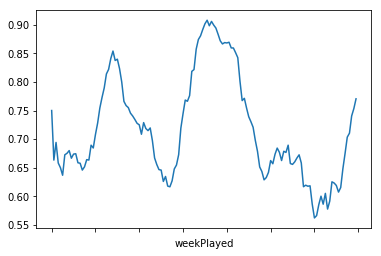

In [60]:
dat = gen_same_week(filt_data)
dat['mean']=dat.mean(axis=1).fillna(1)
dat['rolling'] = dat['mean'].rolling(window=13,min_periods=1).mean()
dat['rolling'].plot();

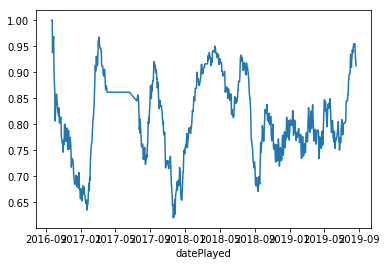

In [62]:
dat = gen_same_day(filt_data)
dat['mean']=dat.mean(axis=1).fillna(1)
dat['rolling'] = dat['mean'].rolling(window=30,min_periods=1).mean()
dat['rolling'].plot();